In [1]:
from docx import Document
import os

In [2]:
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings

warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)

In [3]:
from bertopic import BERTopic
import numpy as np
from time import sleep
import pickle
import os
import gensim
from nltk.stem import WordNetLemmatizer

In [4]:
def get_ques_list(folder):
    os.chdir(folder)
    list_of_files = os.listdir()
    all_ques = {}
    for filename in list_of_files:
        if(filename[len(filename)-5:] == '.docx'):
            doc = Document(filename)
            # print(filename)
            # print(doc)

            fullText = []
            for para in doc.paragraphs:
                # print(para.text)
                fullText.append(para.text)
            # doctxt =  '\n'.join(fullText)
            doctxt = fullText
            fullText = []
            for eachl in doctxt:
                # print(eachl)
                if len(eachl) == 0:
                    continue
                elif eachl[0] == 'Q':
                    fullText.append(eachl.split(".", 1)[1])   # for networking "." -> " "
                else:
                    fullText[len(fullText)-1] = fullText[len(fullText)-1] + ' ' + eachl

            all_ques[filename[:len(filename)-5]] = fullText
            # all_ques = all_ques + fullText
            # print(doctxt)
            # print(fullText)
    os.chdir("..")
    return all_ques

In [5]:
def ls(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')

# Tokenize and lemmatize
def pp(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 1:         # for networking > 1
            result.append(ls(token))
    result = ' '.join(result)
    return result

In [6]:
def check_for(folder):
    ques_list_per_company = get_ques_list(folder)
    os.chdir(folder)
    print(os.getcwd(), '\n Now importing model\n')

    model = BERTopic.load('model_cpu')     # default stored using 'model_cpu'

    for key, value in ques_list_per_company.items():
        print("For company : ", key)
        ques_list = value
        for ques in ques_list:
            print("Before prepro : ", ques)
            # for predicting the topics for any new sentence
            new_check = pp(ques)
            print("After prepro : ", new_check)

            #  Find topics
            num_of_topics = 3
            similar_topics, similarity = model.find_topics(new_check, top_n=num_of_topics)

            print(
                f'The top {num_of_topics} similar topics are {similar_topics}, and the similarities are {np.round(similarity, 2)}')

            # for printing those 3 topics
            for index, top in enumerate(similar_topics):
                keys = [t[0] for t in model.get_topic(top)]
                print(f'{keys} : with probability \n{np.round(similarity, 2)[index]}')

            print()
            sleep(1)
    print()
    print()

    os.chdir('..')

In [7]:
os.chdir("theory")


In [8]:
print(os.getcwd())           # model : model_cpu_len_gt_2  ,  preprocessing : len > 2
check_for("DBMS")

C:\Users\hp\PycharmProjects\placement\theory
C:\Users\hp\PycharmProjects\placement\theory\DBMS 
 Now importing model

For company :  amazon
Before prepro :   What is DBMS?
After prepro :  dbms
The top 3 similar topics are [2, 4, 121], and the similarities are [0.68 0.49 0.47]
['dbms', 'software', 'application', 'ibm', 'commercial', 'database', 'system', 'package', 'resource', 'large'] : with probability 
0.68
['jdbc', 'sql', 'embedded', 'program', 'java', 'programming', 'statement', 'cli', 'host', 'driver'] : with probability 
0.49
['psm', 'procedure', 'sql', 'stored', 'conditional', 'programming', 'statement', 'construct', 'elseif', 'module'] : with probability 
0.47

Before prepro :   What is Database?
After prepro :  database
The top 3 similar topics are [2, -1, 4], and the similarities are [0.69 0.61 0.59]
['dbms', 'software', 'application', 'ibm', 'commercial', 'database', 'system', 'package', 'resource', 'large'] : with probability 
0.69
['attribute', 'relation', 'employee', 'dat

Before prepro :   What is the difference between an entity and an attribute?
After prepro :  difference entity attribute
The top 3 similar topics are [42, 90, -1], and the similarities are [0.43 0.4  0.38]
['multivalued', 'composite', 'valued', 'attribute', 'versus', 'simple', 'derived', 'kind', 'single', 'component'] : with probability 
0.43
['semantics', 'relation', 'schema', 'meaning', 'grouping', 'explain', 'goodness', 'interpret', 'attribute', 'better'] : with probability 
0.4
['attribute', 'relation', 'employee', 'database', 'operation', 'user', 'figure', 'set', 'department', 'data'] : with probability 
0.38

Before prepro :   What are the various kinds of interactions catered by DBMS?
After prepro :  kinds interactions cater dbms
The top 3 similar topics are [2, 16, 123], and the similarities are [0.44 0.41 0.36]
['dbms', 'software', 'application', 'ibm', 'commercial', 'database', 'system', 'package', 'resource', 'large'] : with probability 
0.44
['schema', 'conceptual', 'extern

Before prepro :   What is Relationship?
After prepro :  relationship
The top 3 similar topics are [142, 3, 174], and the similarities are [0.77 0.7  0.6 ]
['couple', 'hasphone', 'car', 'relationship', 'accomplishes', 'manufacture', 'relation', 'justify', 'sentence', 'advises'] : with probability 
0.77
['relationship', 'entity', 'binary', 'ratio', 'cardinality', 'supply', 'type', 'ternary', 'participation', 'instance'] : with probability 
0.7
['modeling', 'enhanced', 'chapter', 'entity', 'relationship', 'model', 'game', 'ebayauction', 'ebaybid', 'spiraled'] : with probability 
0.6

Before prepro :   What are the disadvantages of file processing systems?
After prepro :  disadvantage file process systems
The top 3 similar topics are [19, 37, 2], and the similarities are [0.32 0.29 0.29]
['transaction', 'processing', 'concurrent', 'multiuser', 'management', 'workflow', 'concept', 'theory', 'support', 'introduction'] : with probability 
0.32
['raid', 'striping', 'disk', 'parity', 'reliabili

Before prepro :   Given a table of transactions and products, write a query to return the product id, product price, and average transaction price of all products with price greater than the average transaction price.
After prepro :  give table transactions products write query return product id product price average transaction price products price greater average transaction price
The top 3 similar topics are [179, 6, 4], and the similarities are [0.28 0.25 0.24]
['nested', 'aggregate', 'subqueries', 'uncorrelated', 'correlated', 'clause', 'query', 'inner', 'parenthesized', 'magic'] : with probability 
0.28
['optimization', 'query', 'cost', 'optimizer', 'strategy', 'execution', 'site', 'plan', 'estimate', 'processing'] : with probability 
0.25
['jdbc', 'sql', 'embedded', 'program', 'java', 'programming', 'statement', 'cli', 'host', 'driver'] : with probability 
0.24

Before prepro :   Let’s say we have two tables, transactions and products. Hypothetically the transactions table consi

In [9]:
def get_topic(folder):
    ques_list_per_company = get_ques_list(folder)
    os.chdir(folder)
    print(os.getcwd(), '\n Now importing model\n')

    model = BERTopic.load('model_cpu')     # default stored using 'model_cpu'
    
    all_topics_per_company = {}
    for key, value in ques_list_per_company.items():
        print("For company : ", key)
        ques_list = value
        one_company_topics = []
        for ques in ques_list:
            # for predicting the topics for any new sentence
            new_check = pp(ques)           # after preprocessing

            #  Find topics
            num_of_topics = 2
            similar_topics, similarity = model.find_topics(new_check, top_n=num_of_topics)
            for topic in similar_topics:
                one_company_topics.append(topic)
        all_topics_per_company[key] = one_company_topics
            
    os.chdir('..')
    return all_topics_per_company

In [10]:
print(os.getcwd())           # model : model_cpu_len_gt_2  ,  preprocessing : len > 2
list_of_topics_per_company = get_topic("DBMS")
list_of_topics_per_company

C:\Users\hp\PycharmProjects\placement\theory
C:\Users\hp\PycharmProjects\placement\theory\DBMS 
 Now importing model

For company :  amazon
For company :  google


{'amazon': [2,
  4,
  2,
  -1,
  2,
  20,
  2,
  16,
  2,
  38,
  2,
  8,
  143,
  29,
  17,
  7,
  21,
  17,
  2,
  4,
  26,
  2,
  2,
  -1,
  174,
  81,
  26,
  40,
  42,
  90,
  2,
  16,
  6,
  196,
  143,
  139,
  176,
  36,
  16,
  2,
  174,
  3,
  16,
  3,
  192,
  2,
  23,
  90,
  2,
  4,
  174,
  -1,
  90,
  16,
  23,
  3,
  142,
  3,
  19,
  37],
 'google': [179,
  90,
  17,
  121,
  21,
  6,
  114,
  94,
  6,
  179,
  32,
  217,
  36,
  179,
  179,
  50,
  69,
  179,
  160,
  179,
  179,
  6,
  19,
  8]}

In [11]:
os.chdir('DBMS')
model = BERTopic.load('model_cpu')
os.chdir('..')

In [70]:
acronym = {}
tp = model.get_topic_info()
for i in range(len(tp['Topic'])):
    print(tp['Topic'].iloc[i], '  :  ', tp['Count'].iloc[i], "  :  ", tp['Name'].iloc[i])
    acronym[tp['Topic'].iloc[i]] = tp['Name'].iloc[i].split(str(tp['Topic'].iloc[i])+'_')[1].split('_')[0] + '_' + str(tp['Topic'].iloc[i])


-1   :   4858   :   -1_attribute_relation_employee_database
0   :   292   :   0_diagram_uml_notation_rose
1   :   268   :   1_index_field_block_file
2   :   203   :   2_dbms_software_application_ibm
3   :   186   :   3_relationship_entity_binary_ratio
4   :   185   :   4_jdbc_sql_embedded_program
5   :   177   :   5_temporal_time_valid_date
6   :   174   :   6_optimization_query_cost_optimizer
7   :   153   :   7_subclass_superclass_specialization_category
8   :   144   :   8_warehouse_olap_warehousing_data
9   :   140   :   9_english_joyce_alice_reltwo
10   :   136   :   10_bucket_hashing_hash_overflow
11   :   136   :   11_xsd_xml_element_document
12   :   128   :   12_book_library_title_discussion
13   :   127   :   13_node_tree_leaf_pointer
14   :   125   :   14_predicate_datalog_interpretation_fact
15   :   122   :   15_lock_locked_item_locking
16   :   120   :   16_schema_conceptual_external_independence
17   :   117   :   17_key_primary_foreign_candidate
18   :   105   :   18_tr

In [71]:
for key,value in acronym.items():
    print(key, " : ", value)

-1  :  attribute_-1
0  :  diagram_0
1  :  index_1
2  :  dbms_2
3  :  relationship_3
4  :  jdbc_4
5  :  temporal_5
6  :  optimization_6
7  :  subclass_7
8  :  warehouse_8
9  :  english_9
10  :  bucket_10
11  :  xsd_11
12  :  book_12
13  :  node_13
14  :  predicate_14
15  :  lock_15
16  :  schema_16
17  :  key_17
18  :  trigger_18
19  :  transaction_19
20  :  distributed_20
21  :  integrity_21
22  :  department_22
23  :  algebra_23
24  :  document_24
25  :  privilege_25
26  :  log_26
27  :  ssn_27
28  :  spatial_28
29  :  length_29
30  :  view_30
31  :  encryption_31
32  :  salary_32
33  :  replication_33
34  :  redo_34
35  :  privacy_35
36  :  aggregate_36
37  :  raid_37
38  :  ontology_38
39  :  security_39
40  :  concurrency_40
41  :  schedule_41
42  :  multivalued_42
43  :  tree_43
44  :  dependency_44
45  :  msec_45
46  :  physical_46
47  :  deadlock_47
48  :  normal_48
49  :  join_49
50  :  timestamp_50
51  :  discus_51
52  :  flight_52
53  :  cursor_53
54  :  semistructured_54
55 

In [14]:
topic_len = len(model.get_topic_info())
print(topic_len)

222


In [15]:
for i in range(1, topic_len+1):
    print(i-1," : ",model.get_topic(i-1))

0  :  [('diagram', 0.08570712608781937), ('uml', 0.05729422722393104), ('notation', 0.0436449474439518), ('rose', 0.03671440949452284), ('rational', 0.030352266475646986), ('diagrammatic', 0.021910459374170098), ('design', 0.02040228737210525), ('methodology', 0.01963245030815918), ('modeling', 0.019224689441596325), ('tool', 0.01913723142409624)]
1  :  [('index', 0.07250183504088772), ('field', 0.033326244481199016), ('block', 0.030872586214908057), ('file', 0.028532850914062557), ('search', 0.02840194171530762), ('clustering', 0.02820808842039231), ('secondary', 0.027611674090354664), ('entry', 0.024580888999536595), ('record', 0.024281617084402435), ('pointer', 0.024156292326416733)]
2  :  [('dbms', 0.03670595114375861), ('software', 0.03216779362834165), ('application', 0.025118957892170293), ('ibm', 0.017607905846384258), ('commercial', 0.016055354735970407), ('database', 0.015858952227218143), ('system', 0.015307398139913506), ('package', 0.015082697870953007), ('resource', 0.013

In [16]:
model.visualize_barchart(top_n_topics=len(model.get_topic_info())-1, n_words=8)

In [72]:
def show_cloud(topics):
    from matplotlib import pyplot as plt
    from wordcloud import WordCloud
    import matplotlib.colors as mcolors
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

    cloud = WordCloud(background_color="white",mask=None, max_words=10,\
                            max_font_size=60,min_font_size=10,prefer_horizontal=0.9,
                            contour_width=3,contour_color='black')

#     topics = [model.get_topic(i) for i in range(0, len(model.get_topic_info())-1)]
    # print(topics)
    fig, axes = plt.subplots(int(len(topics)**0.5), int(len(topics)**0.5), figsize=(10,10), sharex=True, sharey=True)

    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        topic_words = dict(topics[i])
    #     print(topic_words)
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=8))
        plt.gca().axis('off')


    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()

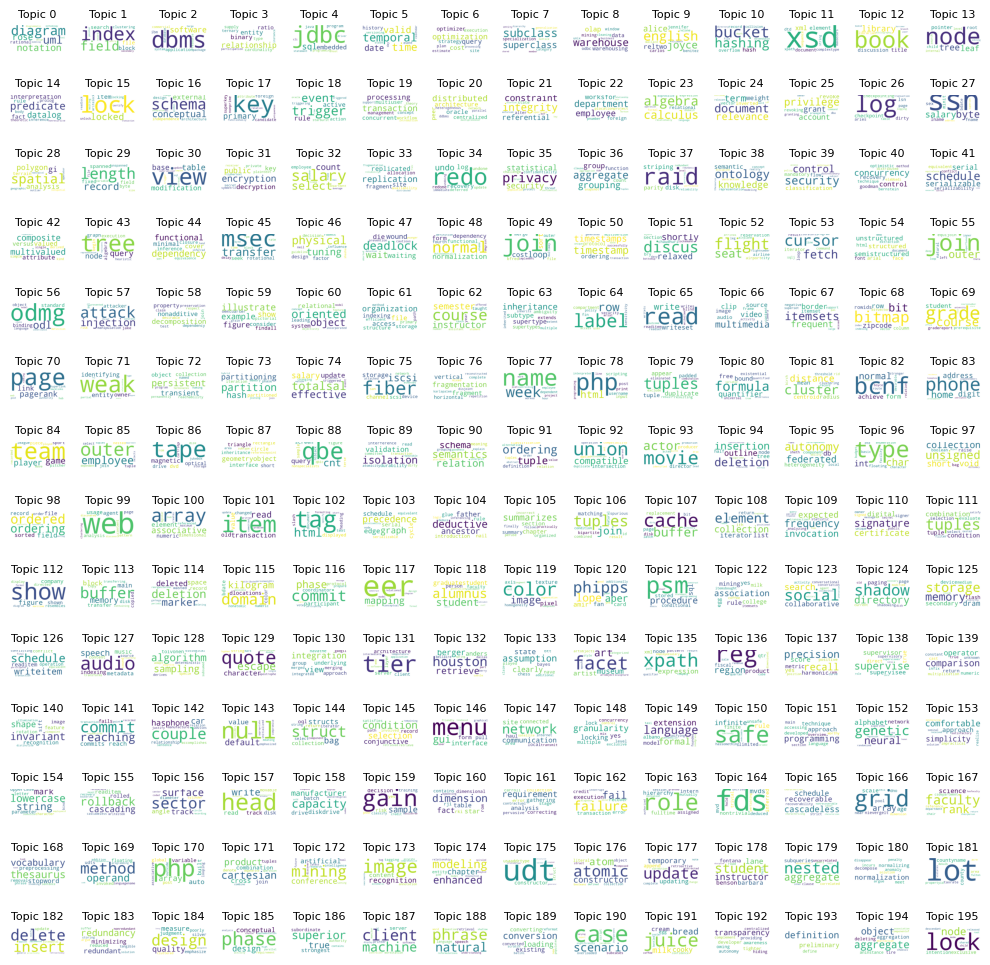

In [73]:
show_cloud([model.get_topic(i) for i in range(0, len(model.get_topic_info())-1)])

In [74]:
from math import ceil
def show_cloud_ceil(topics, topic_numbers):
    from matplotlib import pyplot as plt
    from wordcloud import WordCloud
    import matplotlib.colors as mcolors
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

    cloud = WordCloud(background_color="white",mask=None, max_words=10,\
                            max_font_size=60,min_font_size=10,prefer_horizontal=0.9,
                            contour_width=3,contour_color='black')

#     topics = [model.get_topic(i) for i in range(0, len(model.get_topic_info())-1)]
    # print(topics)
    fig, axes = plt.subplots(ceil(len(topics)**0.5), ceil(len(topics)**0.5), figsize=(10,10), sharex=True, sharey=True)
    
    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        if i >= len(topics):
            fig.delaxes(ax)
            continue
        topic_words = dict(topics[i])
    #     print(topic_words)
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(topic_numbers[i]), fontdict=dict(size=8))
        plt.gca().axis('off')


    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()

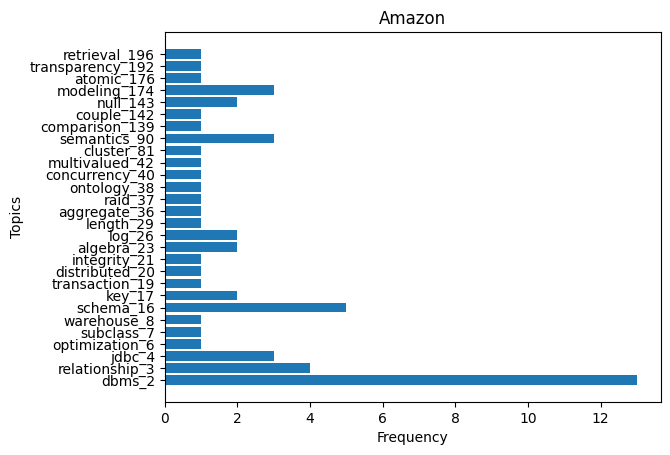

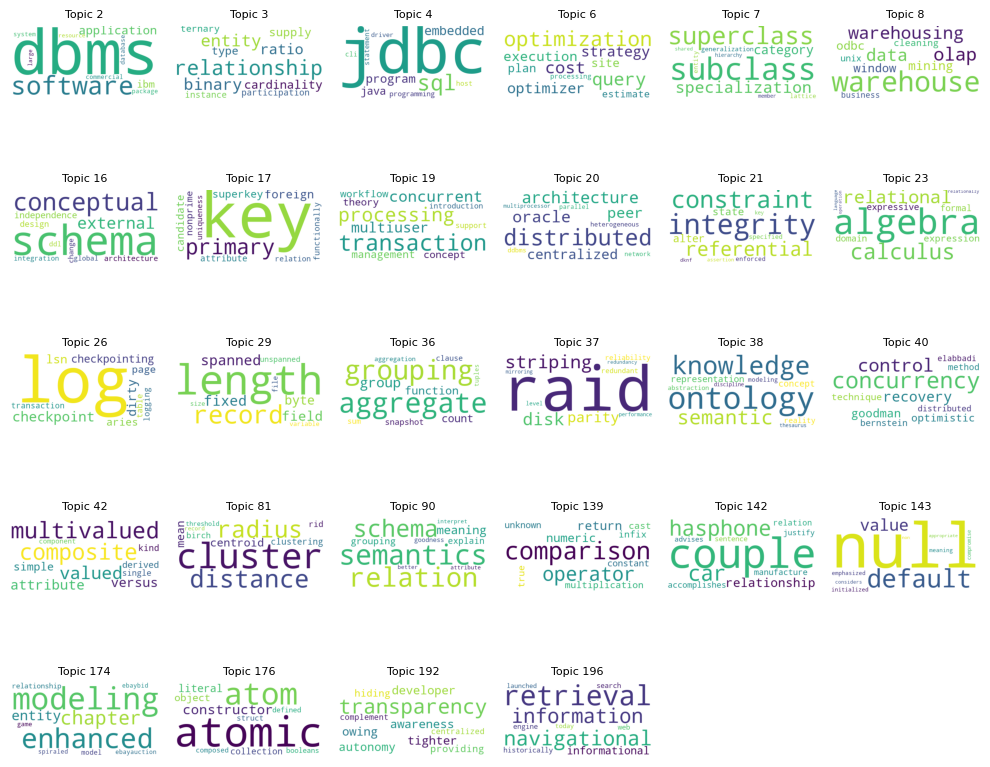

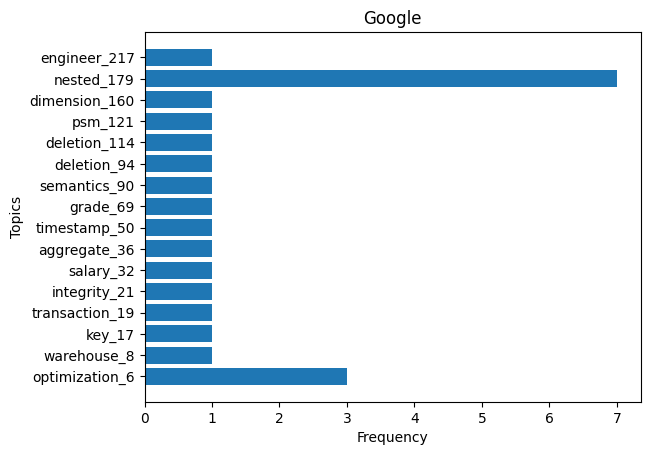

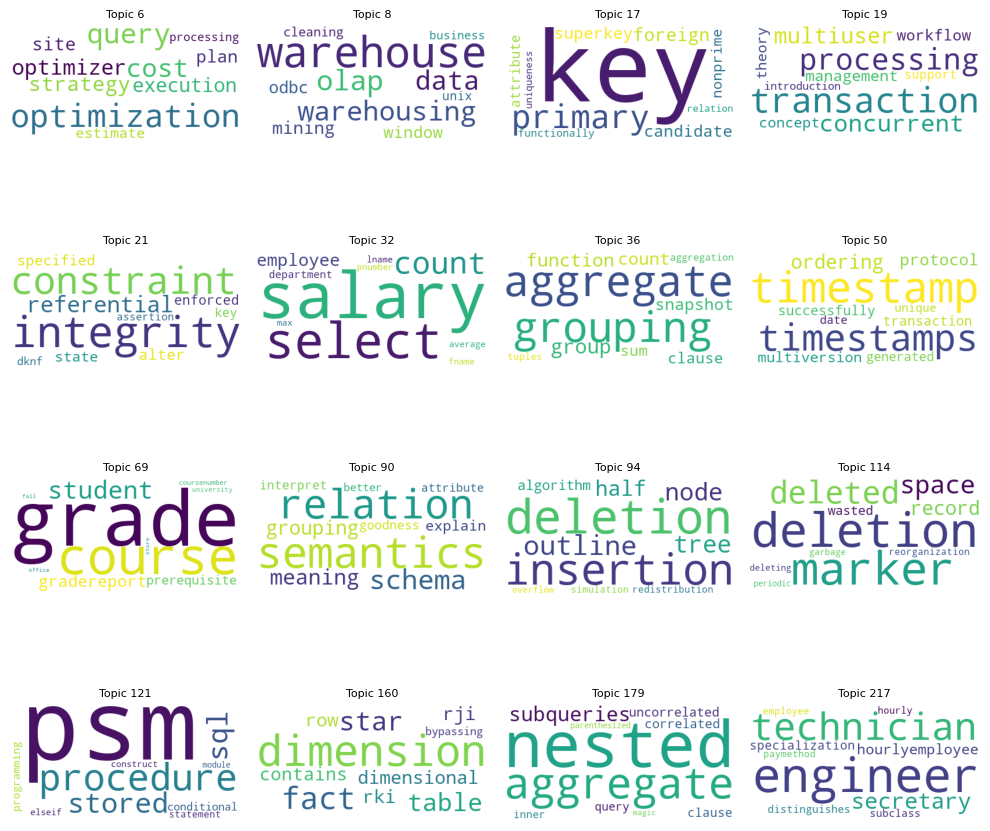

In [75]:
import matplotlib.pyplot as plt

# The given data
data = list_of_topics_per_company

# Extracting unique numbers from the data
unique_numbers = set()
for company_data in data.values():
    unique_numbers.update(set(company_data))
unique_numbers = sorted(list(unique_numbers))

# Counting frequency of each unique number for each company
company_frequencies = {}
for company_name, company_data in data.items():
    company_frequencies[company_name] = {}
    for number in unique_numbers:
        if number == -1:
            continue
        company_frequencies[company_name][number] = company_data.count(number)

# Plotting bar graph for each company
for company_name, company_frequency in company_frequencies.items():
    y_values = [key for key, value in company_frequency.items() if value > 0]
    for_cloud = [model.get_topic(topic_number) for topic_number in y_values]
    topic_numbers = [topic_number for topic_number in y_values]
    x_values = [company_frequency[key] for key in y_values]
    y_values = [acronym[value] for value in y_values]
    plt.barh(y_values, x_values)
    plt.title(company_name.capitalize())
    plt.xlabel('Frequency')
    plt.ylabel('Topics')
    plt.yticks(y_values)
    plt.show()
    show_cloud_ceil(for_cloud, topic_numbers)
